In [38]:
import pandas as pd
import numpy as np  # Add this import statement for numpy

# Read the CSV file
df = pd.read_csv('C:/Users/Mega Store/Desktop/dsmproj/dataofdsm.csv')

# Display the first few rows of the DataFrame
print(df.head())

# Display DataFrame info
print(df.info())

# Display summary statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Drop rows with missing values
df.dropna(inplace=True)

# Check for missing values after dropping
print(df.isnull().sum())

# Check for and drop duplicate rows
print(df.duplicated().sum())

# Function to detect and remove outliers
def iqr_outliers(column):
    q1 = np.percentile(column, 25)
    q3 = np.percentile(column, 75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    filtered_df = df[(df[col] > lower_bound) & (df[col] < upper_bound)]
    if len(filtered_df) > 0:  # Check if there are any rows left after filtering
        return filtered_df, len(df) - len(filtered_df)
    else:
        return df, 0  # Return original DataFrame and outlier count of 0

# Track the number of rows removed due to outliers
num_rows_removed = 0

# Iterate through numeric columns (excluding index/ID columns)
for col in df.select_dtypes(include=[np.number]).columns:
    if col not in df.index.names:
        filtered_df, removed_count = iqr_outliers(df[col])
        df = filtered_df.copy()
        num_rows_removed += removed_count

# Print summary
print(f"Total rows removed due to outliers: {num_rows_removed}")


   Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   i

In [39]:
# Group Weekly_Weekly_Weekly_Sales by store and find the maximum
total_Weekly_Sales_per_store = df.groupby('Store')['Weekly_Sales'].sum()

# Sort stores by total Weekly_Weekly_Weekly_Sales in descending order
sorted_total_Weekly_Sales = total_Weekly_Sales_per_store.sort_values(ascending=False)

# Print comparison
print("Comparison of stores based on total Weekly_Sales:")
for index, Weekly_Weekly_Sales in sorted_total_Weekly_Sales.items():
    print(f"Store {index}: {Weekly_Weekly_Sales}")
total_Weekly_Weekly_Sales_per_store = df.groupby('Store')['Weekly_Sales'].sum()

# Sort stores by total Weekly_Weekly_Sales in descending order
sorted_total_Weekly_Weekly_Sales = total_Weekly_Weekly_Sales_per_store.sort_values(ascending=False)

# Get maximum Weekly_Weekly_Sales value and store ID
max_Weekly_Weekly_Sales_store = sorted_total_Weekly_Weekly_Sales.index[0]  # Get the store ID of the first row (highest Weekly_Weekly_Sales)
max_Weekly_Weekly_Sales_value = sorted_total_Weekly_Weekly_Sales.values[0]  # Get the Weekly_Weekly_Sales value of the first row (highest Weekly_Weekly_Sales)

print("\nMaximum Weekly_Sales Information:")
print(f"Store with maximum Weekly_Sales: {max_Weekly_Weekly_Sales_store}")
print(f"Maximum WWeekly_Sales value: {max_Weekly_Weekly_Sales_value}")


Comparison of stores based on total Weekly_Sales:
Store 20: 280023734.81
Store 14: 276127584.78
Store 2: 268722063.5
Store 13: 268202470.39
Store 10: 255678877.44
Store 27: 248038735.05
Store 4: 244648709.65
Store 1: 222402808.85
Store 6: 221028555.46
Store 39: 207445542.47
Store 19: 206634862.1
Store 31: 199613905.5
Store 24: 194016021.28
Store 11: 193962786.8
Store 41: 181341934.89000002
Store 32: 166819246.16
Store 18: 155114734.21
Store 22: 147075648.57
Store 26: 142598908.65
Store 34: 138249763.0
Store 23: 137248362.0
Store 35: 131520672.08
Store 8: 129951181.13
Store 17: 126699067.69
Store 45: 112395341.42
Store 21: 108117878.92
Store 25: 101061179.17
Store 40: 96697902.45
Store 43: 90565435.41
Store 15: 89133683.92
Store 7: 81040247.37
Store 42: 79565752.42999999
Store 9: 77789218.99
Store 29: 77141554.31
Store 16: 74252425.4
Store 37: 74202740.32
Store 30: 62716885.12
Store 3: 57586735.07
Store 36: 53412214.97
Store 5: 45475688.9
Store 44: 43293087.84
Store 33: 37160221.96
Stor

In [40]:
df['Date']=pd.to_datetime(df['Date'], format='%d-%m-%Y')
# Group Weekly_Sales by store and calculate standard deviation
std_dev_per_store = df.groupby('Store')['Weekly_Sales'].std()

for index, Weekly_Weekly_Sales in std_dev_per_store.items():
     print(f"Store {index}: {Weekly_Weekly_Sales}")
# Find store with maximum standard deviation
max_std_dev_store = std_dev_per_store.idxmax()
max_std_dev_value = std_dev_per_store.max()

print("Store with maximum Weekly_Sales standard deviation:", max_std_dev_store)
print("Maximum standard deviation:", max_std_dev_value)


Store 1: 155980.76776119994
Store 2: 169006.39221710703
Store 3: 46319.6315569098
Store 4: 154659.45313792635
Store 5: 37737.9657447451
Store 6: 189287.8073901738
Store 7: 112978.99341003047
Store 8: 106280.82988091325
Store 9: 69028.66658471408
Store 10: 164541.541341963
Store 11: 165833.88786308072
Store 12: 50132.48175772684
Store 13: 129720.44705090865
Store 14: 236903.7852434149
Store 15: 120538.65204319068
Store 16: 85769.68013311694
Store 17: 111414.9872767633
Store 18: 176641.51083924595
Store 19: 191722.63873007408
Store 20: 152868.2356672559
Store 21: 128752.81285322401
Store 22: 161251.3506309915
Store 23: 250838.1385934859
Store 24: 167745.67756711715
Store 25: 112976.7886004604
Store 26: 109708.66183186832
Store 27: 198411.77780686968
Store 28: 128774.70426345571
Store 29: 99120.13659614499
Store 30: 22809.665590198485
Store 31: 125855.94293256958
Store 32: 138017.25208740897
Store 33: 24132.9273222455
Store 34: 104630.16467575564
Store 35: 211243.45779146877
Store 36: 607

In [41]:
# Check if 'Date' column is datetime
if not pd.api.types.is_datetime64_dtype(df['Date']):
    # Try converting 'Date' to datetime (format: DD-MM-YYYY)
    df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Calculate mean Weekly_Sales during non-holidays
non_holiday_Weekly_Sales = df[df['Holiday_Flag'] == 0]['Weekly_Sales']
mean_Weekly_Sales_non_holiday = non_holiday_Weekly_Sales.mean()
print('the mean Weekly_Sales in the non-holiday:',non_holiday_Weekly_Sales.mean())
# Filter holidays with Weekly_Sales higher than mean non-holiday Weekly_Sales
holiday_Weekly_Sales_above_mean = df[(df['Holiday_Flag'] == 1) & (df['Weekly_Sales'] > mean_Weekly_Sales_non_holiday)]

# Extract holiday dates
holiday_dates_above_mean = holiday_Weekly_Sales_above_mean['Date'].dt.strftime('%Y-%m-%d').tolist()

number_of_holidays = len(holiday_dates_above_mean)
print("Holidays with higher Weekly_Sales than the mean Weekly_Sales in the non-holiday season:",number_of_holidays)
if holiday_dates_above_mean:
    for date in holiday_dates_above_mean:
        print(date)
else:
    print("No holidays found with Weekly_Sales higher than the mean non-holiday Weekly_Sales.")

the mean Weekly_Sales in the non-holiday: 1035645.0108787218
Holidays with higher Weekly_Sales than the mean Weekly_Sales in the non-holiday season: 192
2010-02-12
2010-09-10
2010-11-26
2010-12-31
2011-02-11
2011-09-09
2011-11-25
2011-12-30
2012-02-10
2012-09-07
2010-02-12
2010-09-10
2010-11-26
2010-12-31
2011-02-11
2011-09-09
2011-11-25
2011-12-30
2012-02-10
2012-09-07
2010-02-12
2010-09-10
2010-12-31
2011-02-11
2011-09-09
2011-12-30
2012-02-10
2010-02-12
2010-09-10
2010-11-26
2010-12-31
2011-02-11
2011-09-09
2011-11-25
2011-12-30
2012-02-10
2012-09-07
2010-11-26
2011-11-25
2010-02-12
2010-09-10
2010-12-31
2011-02-11
2011-09-09
2011-12-30
2012-02-10
2012-09-07
2010-02-12
2010-09-10
2010-11-26
2010-12-31
2011-02-11
2011-09-09
2011-11-25
2011-12-30
2012-02-10
2012-09-07
2010-02-12
2010-09-10
2010-12-31
2011-02-11
2011-09-09
2011-12-30
2012-02-10
2012-09-07
2010-02-12
2010-09-10
2010-12-31
2011-02-11
2011-09-09
2011-11-25
2011-12-30
2012-02-10
2012-09-07
2010-11-26
2011-11-25
2010-09-10


In [42]:
df['Date'] = pd.to_datetime(df['Date'])

# Extract month and season from the 'Date' column
df['Month'] = pd.cut(
df['Date'].dt.month,
bins=[0,1,2,3,4,5,6,7,8,9,10,11,12],
labels=['January','February','March','April','May','June','July','August','September','October','November','December'])
df['Season'] = pd.cut(
    df['Date'].dt.month, 
    bins=[0, 3, 6, 9, 12], 
    labels=['Winter', 'Spring', 'Summer', 'Fall']
)

# Group by month and season, and calculate total sales in units
monthly_sales = df.groupby('Month')['Weekly_Sales'].sum()
seasonal_sales = df.groupby('Season')['Weekly_Sales'].sum()
print(seasonal_sales)
# Find the highest and lowest season in terms of sales
highest_season = seasonal_sales.idxmax()
lowest_season = seasonal_sales.idxmin()

# Calculate the total sales for the highest and lowest seasons
highest_sales = seasonal_sales.max()
lowest_sales = seasonal_sales.min()

# Print the results
print("Highest Season in Sales:", highest_season, "with", highest_sales, "Weekly_Sales")
print("Lowest Season in Sales:", lowest_season, "with", lowest_sales,"Weekly_Sales")
print(monthly_sales)

      # Find the highest and lowest months in terms of sales
highest_month = monthly_sales.idxmax()
lowest_month = monthly_sales.idxmin()
# Calculate the total sales for the highest and lowest months
highest_sales_month = monthly_sales.max()
lowest_sales_month = monthly_sales.min()

# Print the results
print("Highest Month in Sales:", highest_month, "with", highest_sales_month, "Weekly_Sales")
print("Lowest Month in Sales:", lowest_month, "with", lowest_sales_month,"Weekly_Sales")

Season
Winter    1.371883e+09
Spring    1.690933e+09
Summer    1.713286e+09
Fall      1.373513e+09
Name: Weekly_Sales, dtype: float64
Highest Season in Sales: Summer with 1713286235.69 Weekly_Sales
Lowest Season in Sales: Winter with 1371883275.33 Weekly_Sales
Month
January      3.033024e+08
February     5.231610e+08
March        5.454199e+08
April        5.999488e+08
May          5.158159e+08
June         5.751681e+08
July         6.062784e+08
August       5.686695e+08
September    5.383383e+08
October      5.438296e+08
November     3.628707e+08
December     4.668126e+08
Name: Weekly_Sales, dtype: float64
Highest Month in Sales: July with 606278427.0 Weekly_Sales
Lowest Month in Sales: January with 303302404.26 Weekly_Sales


C:\Users\Mega Store\AppData\Local\Temp\ipykernel_12900\3439335149.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_sales = df.groupby('Month')['Weekly_Sales'].sum()
C:\Users\Mega Store\AppData\Local\Temp\ipykernel_12900\3439335149.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  seasonal_sales = df.groupby('Season')['Weekly_Sales'].sum()


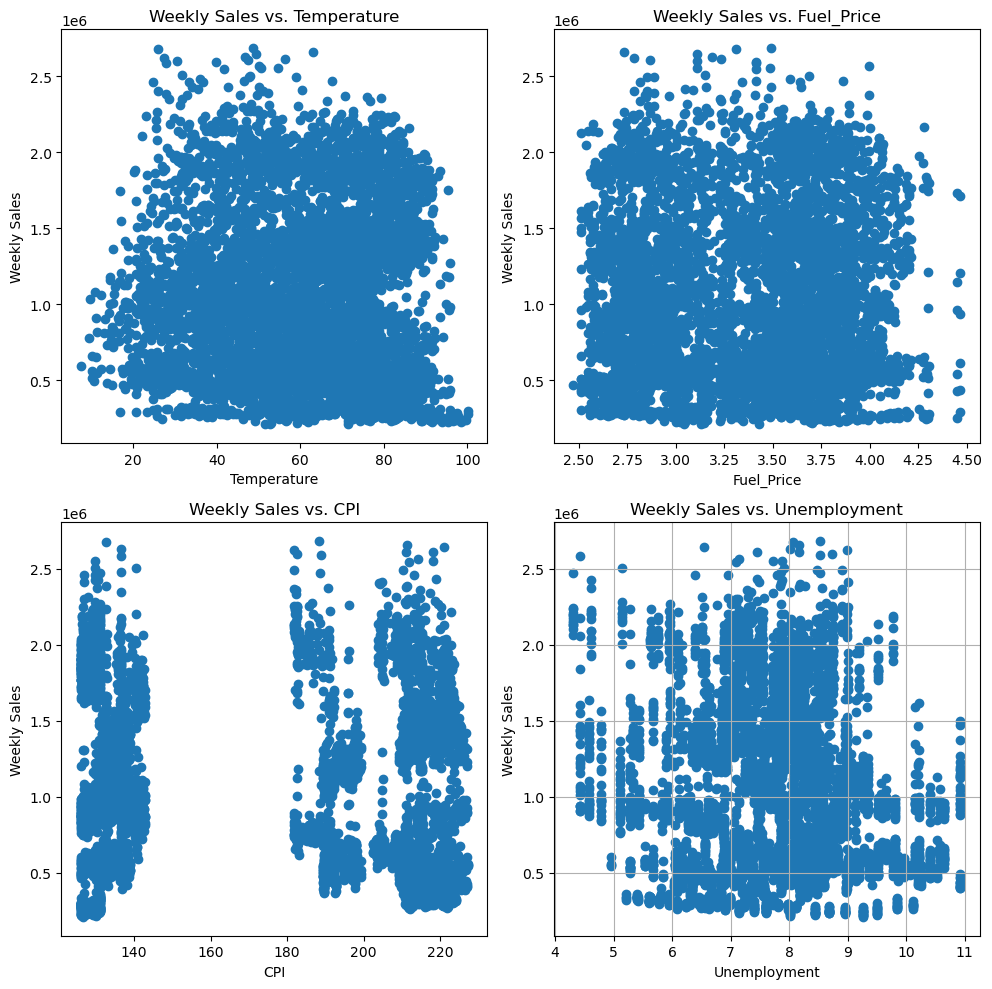

In [43]:
import matplotlib.pyplot as plt

# Assuming your data is in a DataFrame named 'df' with 'Weekly_Sales' and other numeric features

# List of numeric features (excluding 'Weekly_Sales') - Update this list with your actual features
numeric_features = ['Temperature', 'Fuel_Price', 'CPI','Unemployment'] 
# Create scatter plots for each numeric feature
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10)) 
for i, feature in enumerate(numeric_features[:4]):
    # Plot data on each subplot
    axes[i // 2, i % 2].scatter(df[feature], df['Weekly_Sales'])
    axes[i // 2, i % 2].set_xlabel(feature)  # Use set_xlabel for clarity
    axes[i // 2, i % 2].set_ylabel('Weekly Sales')  # Use set_ylabel for clarity
    axes[i // 2, i % 2].set_title(f'Weekly Sales vs. {feature}')  # Use set_title for clarity

plt.grid(True)
plt.tight_layout()  # Adjust spacing between subplots (optional)
plt.show()

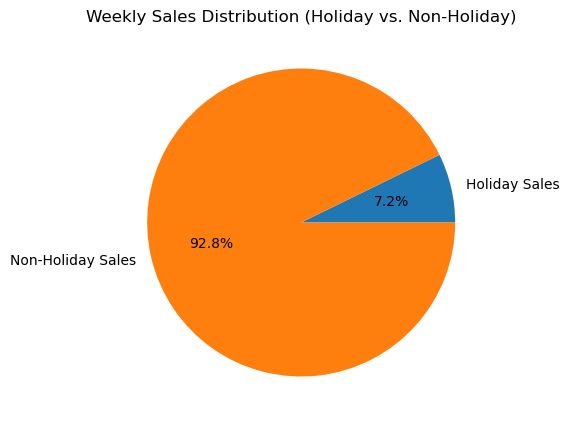

In [44]:
# Assuming 'df' has columns 'Weekly_Sales' and 'Holiday_Flag'

# Calculate total weekly sales and holiday sales
total_sales = df['Weekly_Sales'].sum()
holiday_sales = df[df['Holiday_Flag'] == 1]['Weekly_Sales'].sum()
non_holiday_sales = total_sales - holiday_sales

# Create labels
labels = ['Holiday Sales', 'Non-Holiday Sales']

# Create the pie chart
plt.figure(figsize=(6, 5))  # Adjust figure size as needed
plt.pie([holiday_sales, non_holiday_sales], labels=labels, autopct="%1.1f%%")
plt.title("Weekly Sales Distribution (Holiday vs. Non-Holiday)")
plt.show()


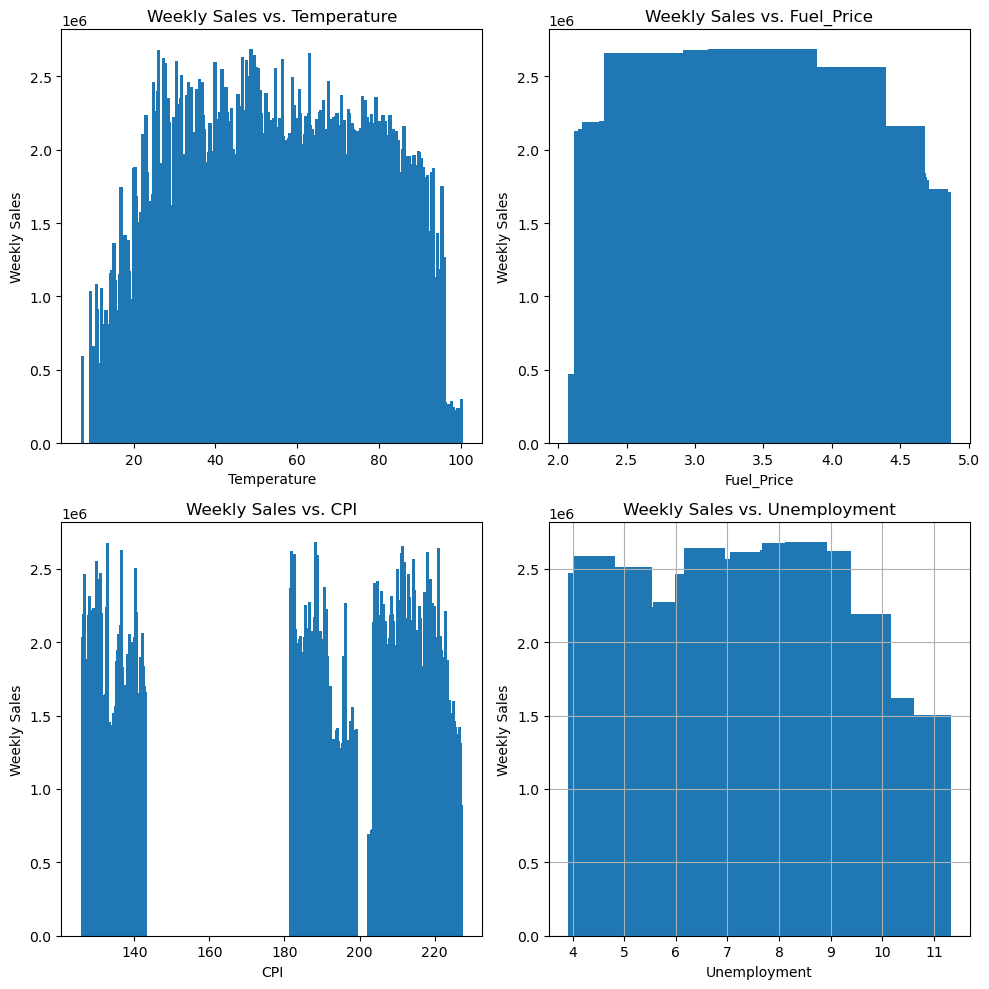

In [45]:

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10)) 
for i, feature in enumerate(numeric_features[:4]):
    # Plot data on each subplot using bar chart
    axes[i // 2, i % 2].bar(df[feature], df['Weekly_Sales'])
    axes[i // 2, i % 2].set_xlabel(feature)
    axes[i // 2, i % 2].set_ylabel('Weekly Sales')
    axes[i // 2, i % 2].set_title(f'Weekly Sales vs. {feature}')

plt.grid(True)
plt.tight_layout()  # Adjust spacing between subplots (optional)
plt.show()
